# Singular Value Decomposition

This post is the third in a 3-part series on building geometric intuition about key concepts in linear algebra.

1. [Linear Transformations]({% post_url 2018-12-03-linear-transformations %})
1. [Eigendecomposition]({% post_url 2018-12-03-eigendecomposition %})
1. [SVD a.k.a Singular Value Decomposition (this)]({% post_url 2018-12-03-svd %})

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from plot_helper import *
#

## What if M is not a symmetric matrix?

In the previous [post]({% post_url 2018-12-03-eigendecomposition %}), we looked at the geometric intuition behind decomposing the transformation of a real, symmetric matrix $M$. Now, let's look at what happens when $M$ is real, but not symmetric. For example,

$$
M = \begin{pmatrix}
2 & 0.1 \\
1 & 2 \\
\end{pmatrix}
$$

Let us inspect the eigenvalues and eigenvectors of $M$.

In [2]:
M = np.array([[2, 0.1],[1, 2]])
evals, C = np.linalg.eig(M)
D = np.diag(evals)
print(f"Eigenvalues (D)\n {D} \n\n Eigenvectors (C)\n {C}")
#

Eigenvalues (D)
 [[2.31622777 0.        ]
 [0.         1.68377223]] 

 Eigenvectors (C)
 [[ 0.30151134 -0.30151134]
 [ 0.95346259  0.95346259]]


## Check the eigenvectors 

* They are not orthogonal
* They are not along the major & minor axes of the ellipse (after transformation)

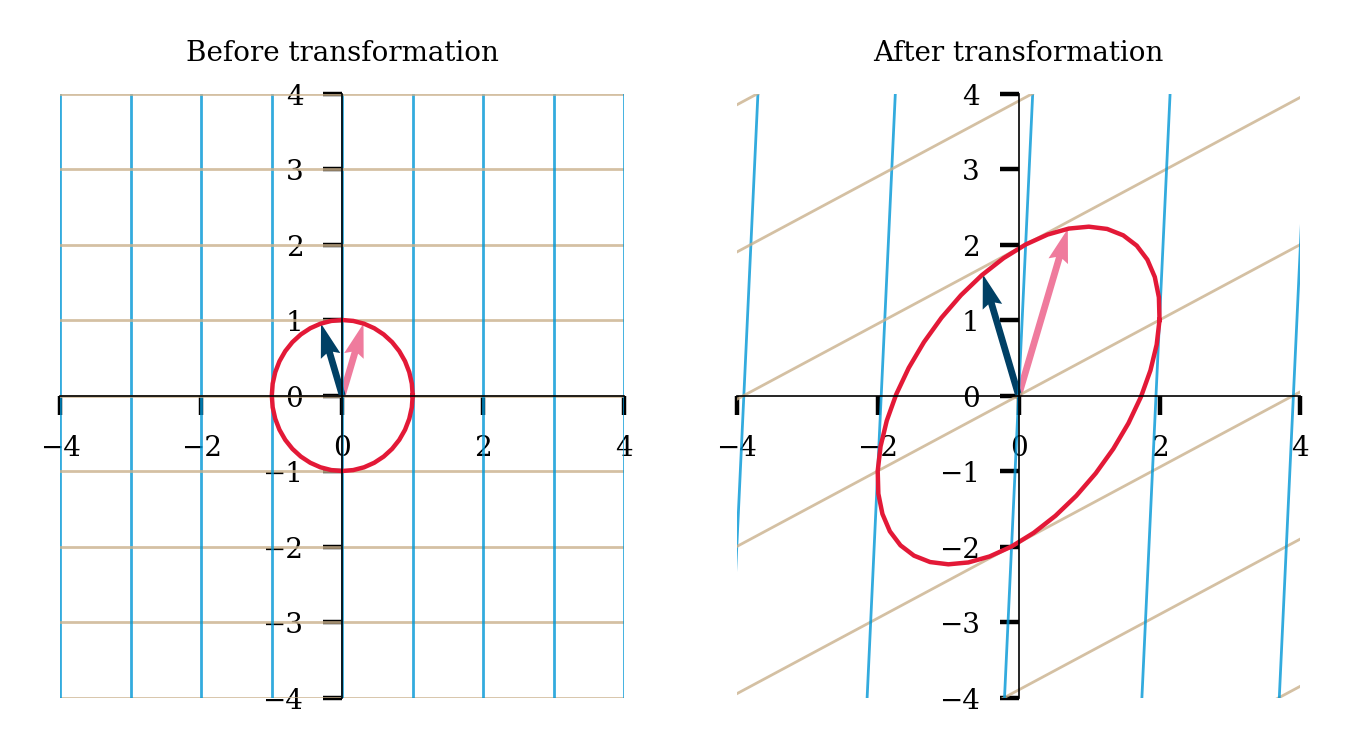

In [3]:
plot_linear_transformation(M, C[:,0], C[:,1], unit_vector=False, unit_circle=True)
#

## Vectors along the major / minor axes of ellipse

Let's denote the vectors along the major / minor axes of ellipse on the right as $u_1,u_2$.

In [4]:
alpha = np.linspace(0, 2*numpy.pi, 5001)
circle = np.vstack((np.cos(alpha), np.sin(alpha)))
ellipse = M @ circle    
lengths = np.linalg.norm(ellipse, axis=0)
u1 = ellipse[:,np.argmax(lengths)]
u2 = ellipse[:,np.argmin(lengths)]
U_v = np.column_stack((u1, u2))
print(f"Major \n {U_v[:,0]} \n\n Minor \n {U_v[:,1]}")
#

Major 
 [1.62412143 2.03032745] 

 Minor 
 [-1.17142204  0.93689404]


## Compute the representation of major / minor before transformation

1. Let $V = [v_1, v_2]$ denote the coordinate representations of $U_v = [u_1,u_2]$ before the transformation.
1. Let's plot the $u$ and $v$ vectors below.
    1. Note that the vectors are orthogonal.
    1. Note also that the $u$ vectors now correspond to the major / minor axes of the ellipse on the right.

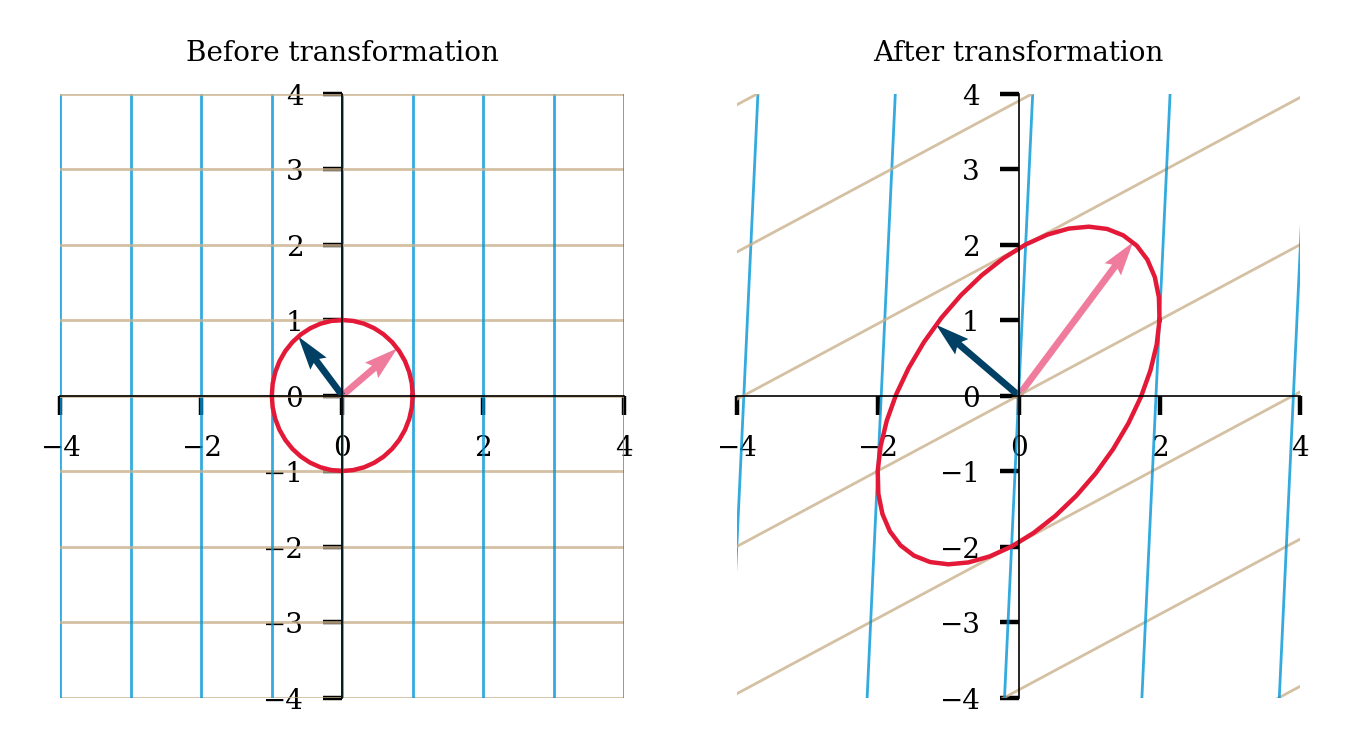

In [5]:
M_inv = np.linalg.inv(M)
V = M_inv @ U_v
plot_linear_transformation(M, V[:,0], V[:,1], unit_vector=False, unit_circle=True)
#

Let's now normalize the column vectors in $U_v$
1. Let $L$ store the lengths of the column vectors in $U_v$
1. Let $U$ be the normalised column vectors in $U_v$
1. Make $L$ a diagonal matrix so that $U_v = UL = MV$

In [6]:
L = np.linalg.norm(U_v, axis=0)
U = U_v/L
L = np.diag(L)
#

In [7]:
assert np.allclose(U@L, M@V)

## Singular Value Decomposition of $M$

\begin{align}
UL &= MV \\
\therefore M &= ULV^{-1} = ULV^T
\end{align}

1. As $V$ is an orthogonal matrix, $V^{-1} = V^T$
1. The columns of $U$ are the left singular vectors of $M$
1. The diagonal entries of $L$ are the singular values of $M$
1. The columns of $V$ are the right singular vectors of $M$

In [8]:
assert np.allclose(M, U@L@V.T)

### Compare the linear transformation by $M$ vs. $ULV^T$

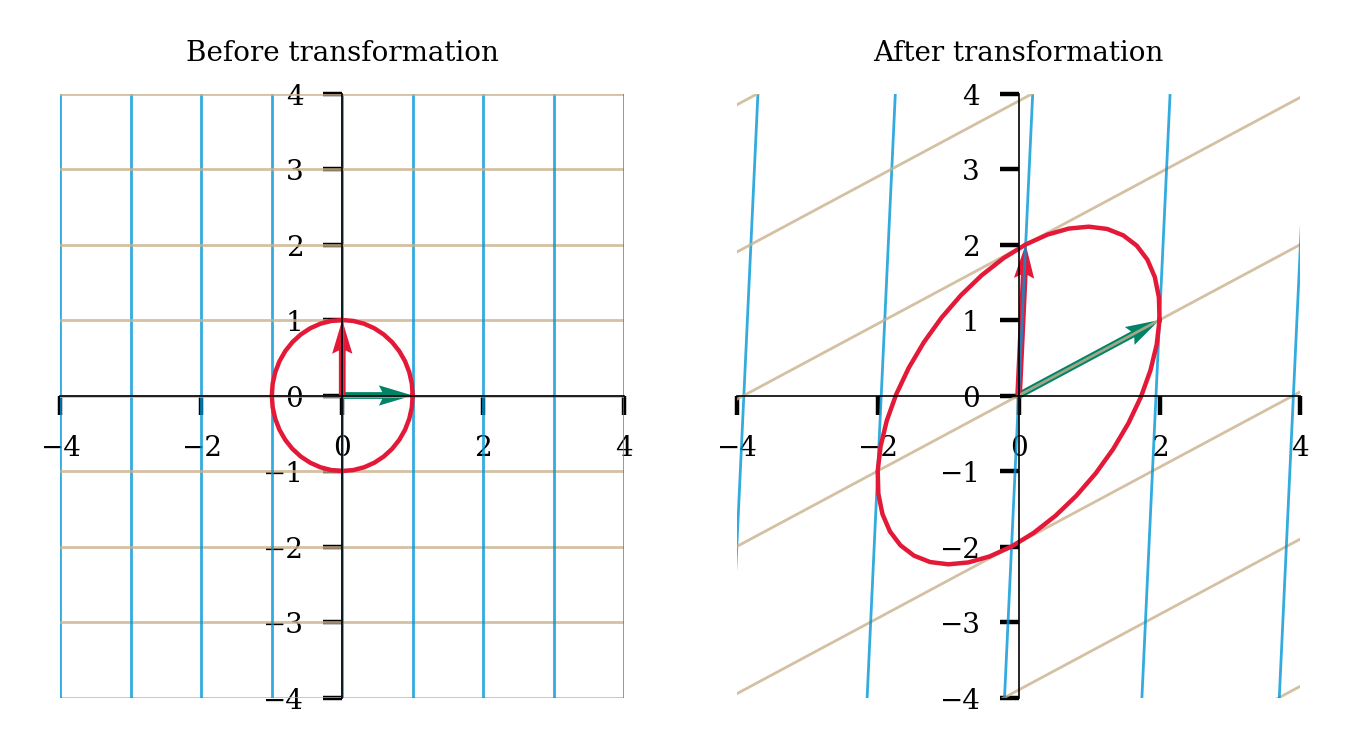

In [9]:
plot_linear_transformation(M, unit_circle=True)

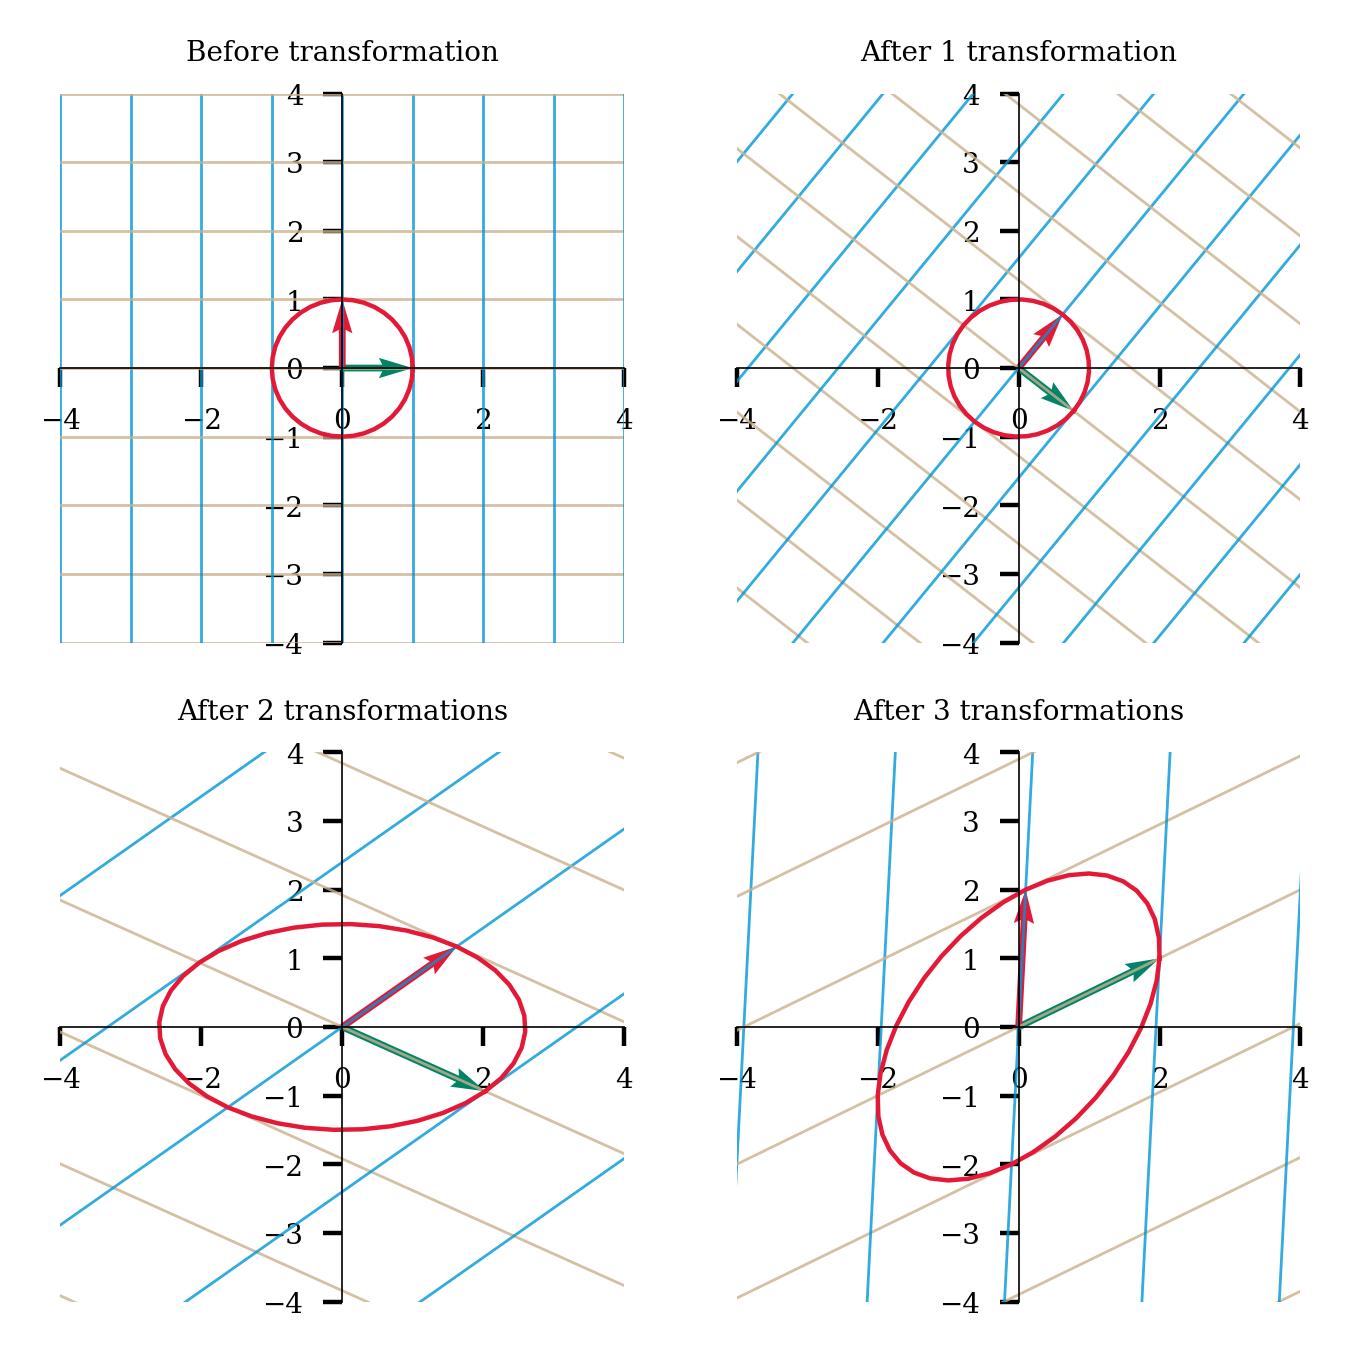

In [10]:
plot_linear_transformations(V.T,L,U, unit_circle=True)

The linear transformation by $M$ is decomposed into these steps:
1. $V^T$ first rotates the coordinate axes
1. $L$ stretches the circle into an ellipse
1. $U$ rotates the coordinate axes again

Let's now compare this decomposition with the SVD implementation from Numpy.

In [11]:
N_U, N_L, N_VT = np.linalg.svd(M)

As we see below, the blue vectors (from Numpy SVD) are aligned with the green vectors (computed above).

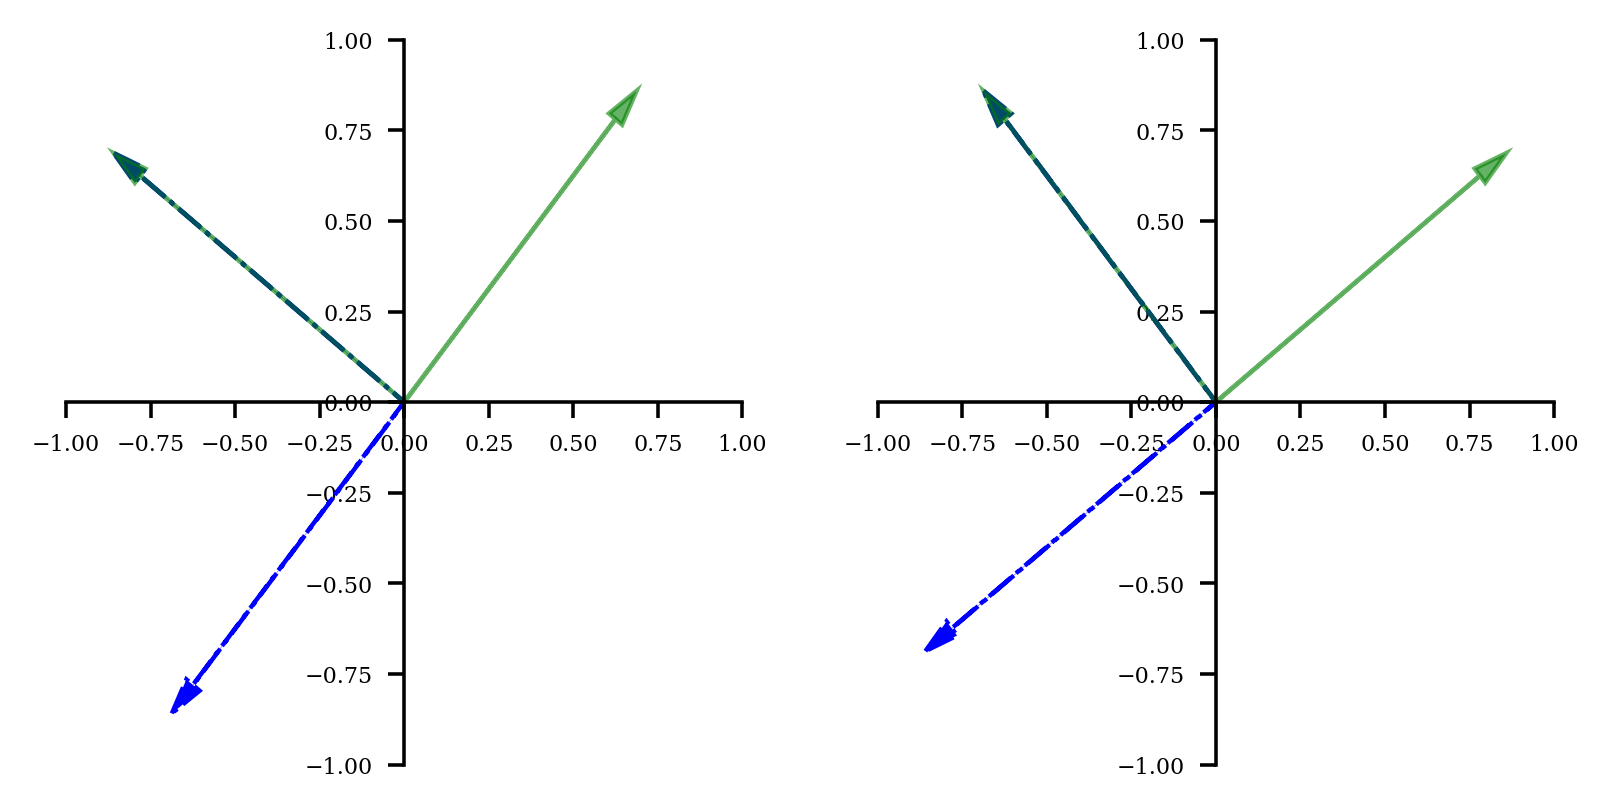

In [12]:
with plt.rc_context():
    plt.rc("figure", dpi=160)
    fig, axes = plt.subplots(ncols=2, figsize=(6,3))
    for ax, (mat_svd, mat_above) in zip(axes.flat, [(N_U, U),(N_VT.T,V)]): 
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.set_xlim([-1,1])
        ax.set_ylim([-1,1])
        for column in mat_svd.T:
            ax.arrow(0,0,*column,head_width=0.05, head_length=0.1, fc='b', ec='b', ls='-.')
        for column in mat_above.T:
            ax.arrow(0,0,*column,head_width=0.05, head_length=0.1, fc='g', ec='g', alpha=0.6)
#

Let's now compare $V$ from Numpy SVD to the eigenvectors of $M^T M$.

In [19]:
N_V = N_VT.T
D, Q = np.linalg.eig(M.T@M)
print(f"V from Numpy SVD of M\n {N_V} \n\n Eigenvectors\n {Q}")
#

V from Numpy SVD of M
 [[-0.78086881 -0.62469505]
 [-0.62469505  0.78086881]] 

 Eigenvectors
 [[ 0.78086881 -0.62469505]
 [ 0.62469505  0.78086881]]


We see that $V$ contains the eigenvectors of $M^TM$. The following derivation explains why this is the case.

### Eigendecomposition of $M^T M$ vs. SVD of $M$

Given $M = U L V^T$,
\begin{align}
M^TM =& ~(U L V^T)^T (U L V^T) \\
     =& ~V L^2 V^T
\end{align}

We also see that the singular values $L$ of $M$ are the square roots of the eigenvalues of $M^TM$.

In [14]:
assert np.allclose(np.diag(D), L**2)

Similarly, $U$ contains the eigenvectors of $MM^T$.

# References

1. [Singular Value Decomposition Lecture by Gilbert Strang](https://www.youtube.com/watch?v=mBcLRGuAFUk)
1. https://github.com/engineersCode/EngComp4_landlinear